<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
%matplotlib inline

In [3]:
pth1 = 'insurance.csv'
pth2 = '/datasets/insurance.csv'
    
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df.duplicated().sum()

153

Датасет содержит 5000 записей, пропусков в данных нет.  
Имеются дублирующиеся записи, т.к. датасет содержит пять признаков, случайное полное совпадение всех признаков для разных клиентов при таком размере датасета кажется маловероятным. 
Все признаки являютя целочисленными. Тип данных признаков `Возраст` и `Зарплата` определен как вещественный и может быть преобразован к целочисленному типу без утраты информации.  
Названия столбцов не соответствуют стилю Python.

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

In [9]:
df['age'] = df['age'].astype(int)
df['salary'] = df['salary'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              4847 non-null   int64
 1   age                 4847 non-null   int32
 2   salary              4847 non-null   int32
 3   family_members      4847 non-null   int64
 4   insurance_payments  4847 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 189.3 KB


In [11]:
df.describe()

,gender,age,salary,family_members,insurance_payments
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


        count    percent
gender                  
0        2431  50.154735
1        2416  49.845265


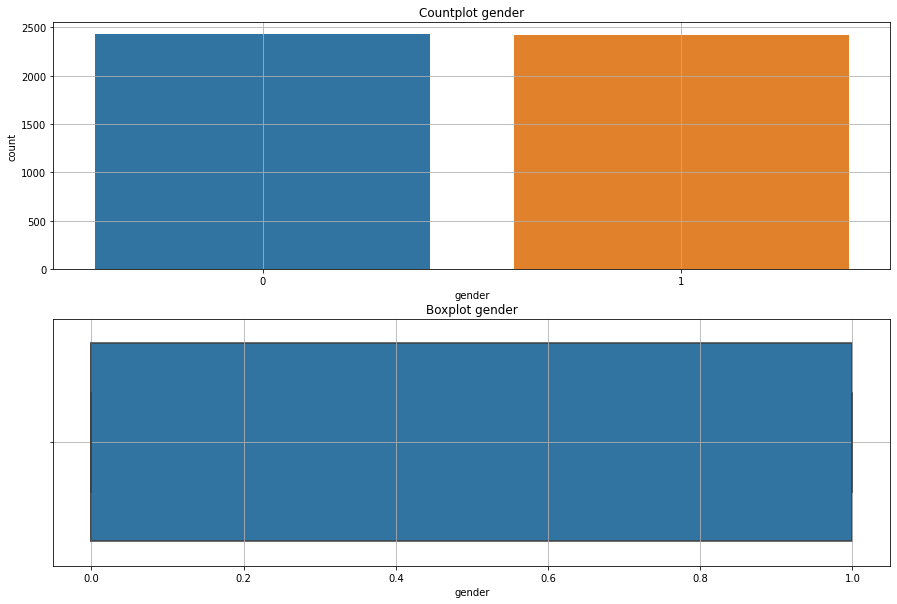

     count   percent
age                 
19     213  4.394471
25     205  4.229420
31     202  4.167526
27     201  4.146895
22     201  4.146895
26     201  4.146895
28     196  4.043738
32     196  4.043738
30     196  4.043738
29     196  4.043738


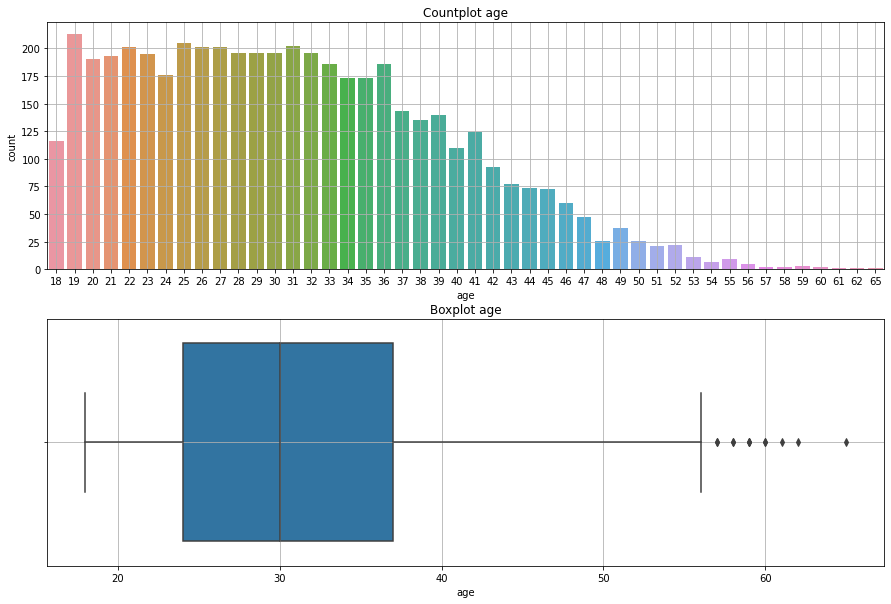

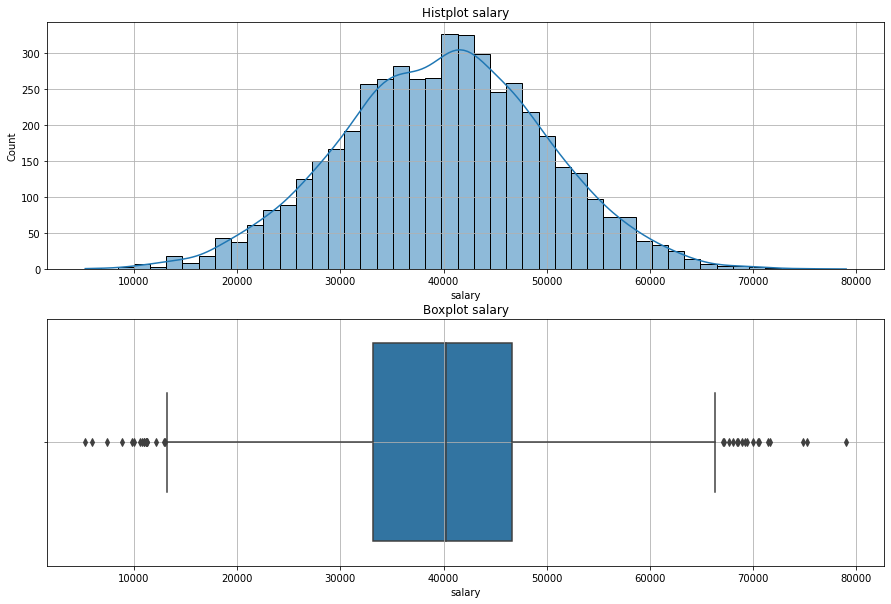

                count    percent
family_members                  
1                1748  36.063544
0                1461  30.142356
2                1038  21.415308
3                 437   9.015886
4                 124   2.558283
5                  32   0.660202
6                   7   0.144419


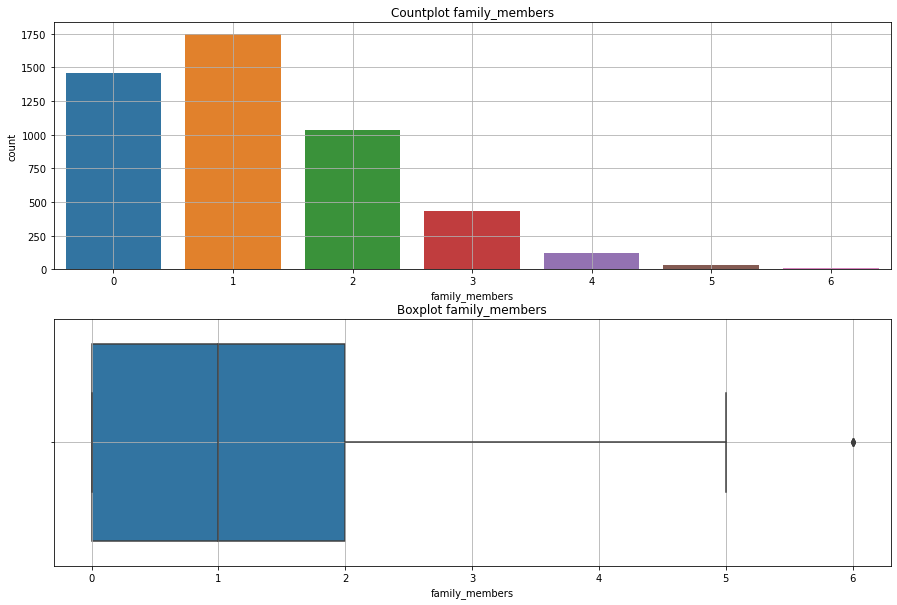

                    count    percent
insurance_payments                  
0                    4284  88.384568
1                     423   8.727048
2                     114   2.351970
3                      18   0.371364
4                       7   0.144419
5                       1   0.020631


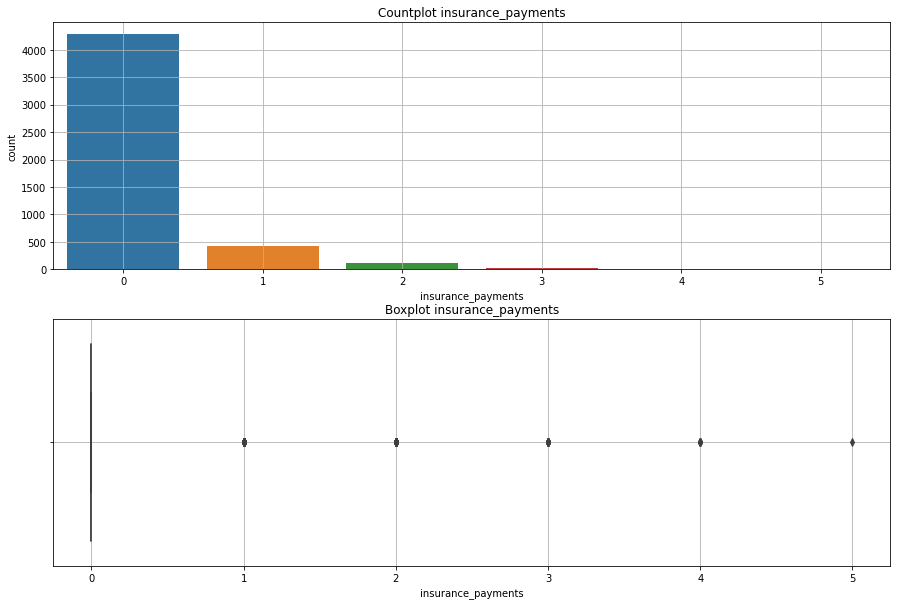

In [12]:
continuous_col = ['salary']
discrete_col = ['gender', 'age','family_members', 'insurance_payments']

for col in df.columns:

    plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    if col in continuous_col:
        sns.histplot(data=df[col], kde=True)
        plt.grid()
        plt.title('Histplot '+col)
    else:
        print(df.groupby(col)[col].agg(['count']).assign(percent=lambda x: x / x.sum() * 100).
                                    sort_values('count', ascending=False)[:10])
        sns.countplot(data=df, x=col)
        plt.grid()
        plt.title('Countplot '+col)
    
    plt.subplot(2,1,2)
    sns.boxplot(data=df, x=col)
    plt.grid()
    plt.title('Boxplot '+col)
    plt.show()

    

* В датасете примерно одинаковое количество мужщин и женщин.  
* Возраст клиентов составляет от 18 до 65 лет, средний возраст - 31 год. Количество клиентов от 19 до 32 лет примерно одинаковое для каждого возраста и составляет около 200 клиентов, в дальнейшем с увеличением возраста, количество клиентов уменьшается.  
* Распределение зарплат клиентов приближенно соответствует нормальному, средняя зарплата ококло 40 тыс. руб.  
* В основном клиенты имеют одного члена семьи, несколько ниже количество клиентов без семей и с двумя членами семьи.  
* 88% клиентов не обращались за страховыми выплатами. Клиенты, обратившиеся за выплатами более 2-х раз единичны. Вероятно, в зависимости от потребностей бизнеса, имеет смысл либо объединить клиентов с 2-мя и более обращениями в одну группу, либо попытаться собрать по таким случаям более представительную выборку. 


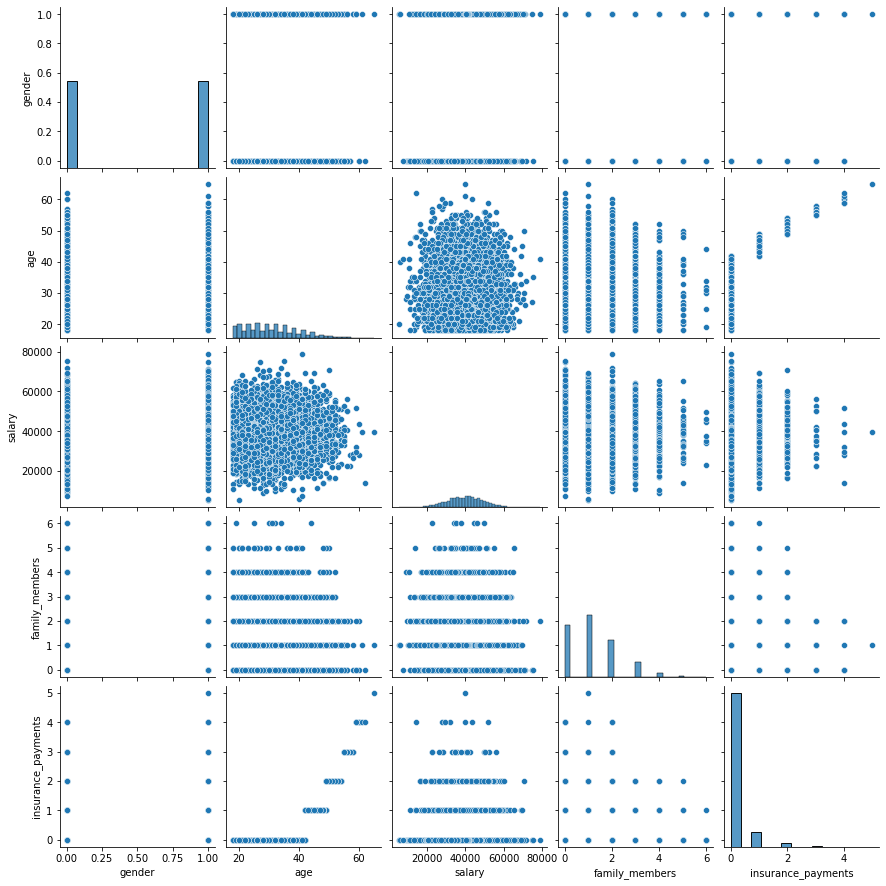

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,gender,age,salary,family_members,insurance_payments
gender,1.000000,0.001953,0.015456,-0.007315,0.011565
age,0.001953,1.000000,-0.017386,-0.009064,0.654964
salary,0.015456,-0.017386,1.000000,-0.031687,-0.013123
family_members,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
insurance_payments,0.011565,0.654964,-0.013123,-0.039303,1.000000


Наиболее коррелирующим с количеством страховых выплат признаком является возраст клиента. Корреляция положительная, с увеличением возраста количество выплат увеличивается. Остальные признаки слабо скоррелированы с целевым признаком. Корреляция признаков между собой также слабая.

In [15]:
df.groupby('insurance_payments')['age'].agg(['mean', 'count'])

,mean,count
insurance_payments,,
0,28.985294,4284
1,44.706856,423
2,50.868421,114
3,55.833333,18
4,60.000000,7
5,65.000000,1


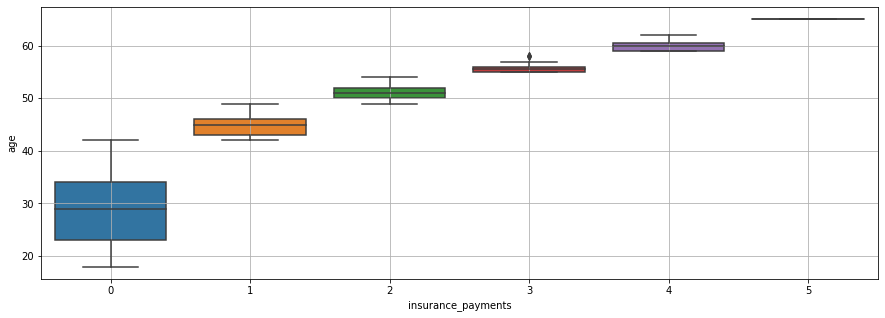

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='insurance_payments', y='age'),
plt.grid()

### Выводы  
Выполнена загрузка исходных данных и их предобработка (удаление дубликатов, переименование столбцов, изменение типов данных). По результатам исследовательского анализа выявлена достаточно сильная корреляция количества страховых выплат с возрастом, корреляция с другими признаками слабая. Наблюдается существенный дисбаланс классов в целевом признаке.

## Умножение матриц

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)  
a. Изменится. Приведите примеры матриц.  
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Произведем обучение модели Линейной регрессии на исходных данных и оценим ее качество.

In [17]:
X = df.drop('insurance_payments', axis=1)
y = df.insurance_payments

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=555)

In [19]:
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
r2_original = r2_score(y_test, y_pred_original)
r2_original

0.45576421235218345

In [20]:
model_original.coef_, model_original.intercept_

(array([ 1.35950344e-02,  3.54895778e-02, -7.57988890e-07, -1.34240955e-02]),
 -0.915342984416661)

Создадим случайную квадратную матрицу размером (n x n), где n - количество признаков в датасете. Проверим ее на обратимость.

In [21]:
n = X.shape[1]

In [22]:
np.random.seed(555)
invertible_matrix = np.random.randint(1, 100, size=n*n).reshape(n, n)
invertible_matrix

array([[27, 47, 34, 69],
       [39, 23, 54, 97],
       [85, 23, 87, 54],
       [75, 86, 28, 93]])

In [23]:
try:
    np.linalg.inv(invertible_matrix)
    print('Матрица обратимая')
except np.linalg.LinAlgError:
    print('Матрица необратимая')


Матрица обратимая


Умножим матрицу признаков исходного датафрейма на созданную обратимую матрицу, переобучим модель на полученной матрице признаков, рассчитаем метрику R2 и сравним ее с первоначальным значением метрики R2

In [24]:
X_train_modified = X_train @ invertible_matrix
X_test_modified = X_test @ invertible_matrix

In [25]:
model_modified = LinearRegression()
model_modified.fit(X_train_modified, y_train)
y_pred_modified = model_modified.predict(X_test_modified)
r2_modified = r2_score(y_test, y_pred_modified)
r2_modified

0.45576421235210607

In [26]:
model_modified.coef_, model_modified.intercept_

(array([-0.00049263, -0.00035415,  0.00026398,  0.00050095]),
 -0.9153429844157615)

In [27]:
r2_original - r2_modified

7.738254481637341e-14

In [28]:
r2_original.round(12) == r2_modified.round(12) 

True

Таким образом, умножение исходных признаков на обратимую матрицу не изменило качество модели (метрики R2 равны до 12-го знака, отличия в последующих цифрах вероятно связаны с особенностями хранения вещественных чисел)

Приведем также теоретическое обоснование неизменности качества модели после умножения признаков на обратимую матрицу

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Формула расчета весов для линейной регрессии:

$$
w = (X^T X)^{-1} X^T y
$$

Представим новую матрицу признаков $Z$ как произведение матрицы $X$ на матрицу $P$ (обратимую):

$$
Z = XP
$$

Подставим новое значение $Z$ в формулу $w1$ и произведем преобразования:

$$
w1 = ((X P)^T X P)^{-1} (X P)^T y = (P^T X^T X P)^{-1} P^T X^T y =
$$
$$ 
= (P^T (X^T X) P)^{-1} P^T X^T y = P^{-1} (X^TX)^{-1} (P^T)^{-1} P^T X^T y
$$

Так как $P$ по условию обратимая, то произведение $(P^T)^{-1} P^T$ равно $E$ (единичная матрица):

$$
w1 = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

Выражение $(X^T X)^{-1} X^T y$ равно $w$:

$$
w1 = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

Подставим новое значение весов  𝑤1  в формулу для предсказаний линейной регрессии.
Предсказания модели расчитываются по формуле:

$$
a = Xw
$$

Подставим в эту формулу значения $Z$ и $w1$ для того, чтобы на их основе вычислить предсказания модели $a1$:

$$
a1 = Zw1 = XPP^{-1} w
$$

Так как $P$ по условию обратимая, то произведение $PP^{-1}$ равно $E$:

$$
a1 = XPP^{-1} w = X E w = X w = a
$$

Таким образом, предсказания $a1$ для матрицы признаков, умноженной на обратимую матрицу $P$ равны предсказаниям $a$.  
Параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w1$ связаны следующим образом:

$$
w1 = P^{-1} w
$$

In [29]:
model_modified.coef_, np.linalg.inv(invertible_matrix) @ model_original.coef_

(array([-0.00049263, -0.00035415,  0.00026398,  0.00050095]),
 array([-0.00049263, -0.00035415,  0.00026398,  0.00050095]))

### Вывод:
Таким образом, умножение исходных признаков на обратимую матрицу не изменит предсказания модели, 

## Алгоритм преобразования

Для защиты данных, согласно приведенным в предыдущем пункте обоснованиям, возможно умножение исходных признаков на обратимую матрицу. Качество модели Линейной Регрессии при этом не изменится. Соответственно, алгоритм преобразования должен содержать создание обратимой матрицы и ее умножение на матрицу признаков. Напишем соответствующую функцию

In [30]:
def modified_features(features, random_seed=777):
    '''
    Функция для преобразования исходных признаков, принимает на вход матрицу признаков,
    возвращает измененную матрицу признаков, полученную из исходной путем умножения
    на случайную обратимую матрицу
    '''
    n = features.shape[1]
    np.random.seed(random_seed)
    try:
        invertible_matrix = np.random.randint(1, 100, size=n*n).reshape(n, n)
    except np.linalg.LinAlgError:
        print('Созданная матрица не обратима, измените значение парамтера random_seed')
    X_modified = X @ invertible_matrix
    return X_modified

## Проверка алгоритма

Рассчитаем метрику R2 для модели Линейной Регрессии с использованием исходных признаков и преобразованных с использованием функции `modified_features` из предыдущего пункта.

In [31]:
def r2_lr(X, y, modify=False):
    '''
    Функция принимает матрицу признаков X и вектор целевого параметра,
    делит выборку на обучающую и валидационную в соотношении 3:1, производит обучение модели 
    Линейной Регрессии, рассчитывает и выводит метрику r2 и коэффициенты уравнения регрессии.
    Если значение параметра modify задано True, применяет преобразование признаков путем умножения
    на случайную обратимую матрицу
    '''
    model = LinearRegression()
    if modify == True:
        X_modified = modified_features(X)
        X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=777)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'Метрика R2 модели: {r2:.3f}')
    print(f'Коэффициенты модели линейной регрессии: {model.coef_}, {model.intercept_}')

In [32]:
r2_lr(X, y)

Метрика R2 модели: 0.418
Коэффициенты модели линейной регрессии: [ 1.37853743e-02  3.63737597e-02 -4.82379339e-07 -1.38079743e-02], -0.9475148673023885


In [33]:
r2_lr(X, y, modify=True)

Метрика R2 модели: 0.418
Коэффициенты модели линейной регрессии: [-0.00020317  0.00201377 -0.00441934  0.00085301], -0.9475148673341642


Метрика R2 модели Линейной Регрессии на исходных и преобразованных данных одинакова.

## Выводы  
Для защиты персональных данных обоснован алгоритм изменения исходных признаков путем их умножения на обратимую матрицу. Доказано, что данная процедура не меняет качество модели Линейной Регрессии. Описанный алгоритм реализован и проверен на имеющихся данных клиентов страховой компании, рассчетная метрика R2 одинакова для моделей как на оригинальных, так и на преобразованных данных.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования